# Project 1: clustering and analysis of the TCGA transcriptomic dataset

## Motivation

The motivation for this project comes from my curiosity about how modern dimensionality-reduction and clustering algorithms are used in biological data analysis, especially in multi-omics and transcriptomics research.  

I wanted to use this assignment as an opportunity to explore a dataset from The Cancer Genome Atlas (TCGA) and to get some hands-on experience with the kinds of workflows that are common in this area.  
 
More specifically, my goal is to compare the performance and interpretability of two popular algorithms: t-SNE and UMAP, for visualizing high-dimensional RNA-seq gene expression data.  

I often come across figures like this one in biology papers and presentations:  
<img src="https://kagi.com/proxy/blog%20Visualizing%20Single-Cell%20RNA-Seq%20Data%20with%20t-SNE-%20Researcher%20Interview%20with%20Dmitry%20Kobak%20and%20Philipp%20Berens.png?c=7wFdHnjdYvjJyaubyYjYK_5knm5a2JLsjaQR61UGXexz8F2uYT094Juv1WUp_PzMmwnpKN5ZFReaild0gjJO-qYdkmh70tqYpbby4dCKNm0OZyBuV34Ol2NhNvchg78pimjQd1EIdaze5CB-TyT4e00TG7I-LwM2QqZPzk_7MlcE35_PlqGs7iocy1jZQfQbxGve0shx9I0WvR2S9Rbf--JtjdMmS4Q-ilJiO-lHIT0drIZI87ocPjXL00i_cmmvHcP93vir7v6ty5IbecFFSdhF7KHW6Lv2EKhtgqJpl3lWWmSnCtP8LMMEsfyZNtL3W5SEPRNpczY0nGKm3vPl2OxYTOyYfc-m3J6mgnzHUpojAIVzxVJWs8E-36cUH2Lc" width="50%"/>  

For a long time, I’ve wondered what these images actually represent and how they’re created. So I want to try to reproduce a similar analysis myself.


## Dataset 
### TCGA TPM Expression Summary: Processed Transcriptomic Data from 10 Cancer Types

<img src="./images/tcga_portal.png" width="70%"/>

[Data link](https://figshare.com/articles/dataset/TCGA_TPM_Expression_Summary_Processed_Transcriptomic_Data_from_10_Cancer_Types/28324271?file=52061405)

*This dataset contains TPM (Transcripts Per Million) expression values derived from The Cancer Genome Atlas (TCGA) for ten cancer types: BRCA (breast cancer), COAD (colon adenocarcinoma), DLBC (diffuse large B-cell lymphoma), KIRC (kidney renal clear cell carcinoma), KIRP (kidney renal papillary cell carcinoma), LUAD (lung adenocarcinoma), LUSC (lung squamous cell carcinoma), MESO (mesothelioma), READ (rectum adenocarcinoma), and SKCM (skin cutaneous melanoma). The data have been processed and curated for downstream bioinformatics analyses.*

Subset selected for the project - **BRCA**.

<img src="https://kagi.com/proxy/fnins-15-591122-g001.jpg?c=GtkVFZg7eGMsIIyzL1SU9bJE-A6ooUHcdFPQcq9yNBq4tVXvY7u9N8_4VJK-6RBk4nqcmmYAh6DqVjHBHn36g-ny0iyhTmSpyqzrvTvbM2JbjAd5Ma-ZKMUkaAgkXEkB-49vZm5XMME_CUCilE35o29T-u29JjrSprwBYWIsflA%3D" width="60%"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

xl = pd.ExcelFile("./TCGA_all_workbook.xlsx")
print("Available sheets:", xl.sheet_names)

df = pd.read_excel("./TCGA_all_workbook.xlsx", sheet_name="brca_tpm_summary_noMSTRG")
df.set_index('transcript', inplace=True)
df.head(5)

Available sheets: ['brca_tpm_summary_noMSTRG', 'coad_tpm_summary_noMSTRG', 'dlbc_tpm_summary_noMSTRG', 'kirc_tpm_summary_noMSTRG', 'kirp_tpm_summary_noMSTRG', 'luad_tpm_summary_noMSTRG', 'lusc_tpm_summary_noMSTRG', 'meso_tpm_summary_noMSTRG', 'read_tpm_summary_noMSTRG', 'skcm_tpm_summary_noMSTRG']


,091a54cd-e3b3-4af2-828f-a80e64504f5e,09a6358a-c852-4054-b91b-66c506e02a0f,0a3555d2-16fa-4798-851f-8217315a0b82,11c9ecd3-a1ef-482d-a644-c2d294d0f150,11d77ef2-b3f9-4af9-8490-71f9a8c599e0,16c146d7-1d5c-4561-867e-1a45e1626b30,185a2892-ff37-4c93-9d11-f2770ad584dd,186dc2a0-0c42-43f8-8d94-799eaffc110b,212fc9b9-ab21-45b5-b2df-341fe52a41aa,3b7d97d0-fb47-4d9d-b521-2bf6bc80c7a7,...,b8cf532a-ad2b-431c-bd2c-e87c163649a6,c0ee6e25-02b9-4b2f-9f23-fd61eedf9945,c1a95836-8888-4e50-956d-419c3caadc36,c27b56c7-5274-47f7-aaa5-cf1c0c0e0b78,c316238f-d565-4199-b464-fc35527b1ebe,ce3d0dc8-55f2-4554-9049-c72d05a4d7a5,d1d092f0-70a1-4ff1-8a2b-5f33a33dba81,dc3ff3a2-41a0-4613-805e-60bb9c1c6a4e,e68385d2-951b-4358-bc3c-08716dab1431,f00b1c59-864c-4bf6-8bd4-7822051d2999
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000000233.10,96.588226,182.424026,200.732666,225.563736,122.175873,101.318871,151.172867,99.286087,124.581367,88.508995,...,188.849960,115.078056,77.919930,172.210861,140.142792,166.523804,116.537567,123.060822,160.017731,195.986786
ENST00000000412.8,50.749279,75.232002,40.181633,49.209694,72.279015,83.726349,80.656120,54.719448,51.147305,81.359032,...,48.033569,40.087833,58.261406,27.534756,77.487747,61.827740,90.873352,100.258850,83.839966,29.193172
ENST00000000442.11,6.423678,12.287890,6.593730,10.920747,13.083251,1.663119,1.896499,3.654462,8.306145,3.746788,...,2.172153,2.011549,2.892610,4.720766,2.489203,12.916063,12.314359,7.219753,10.521680,5.560592
ENST00000001008.6,123.573334,313.044373,154.982452,93.763306,121.564682,280.926239,253.414612,121.853851,170.002563,178.666611,...,131.388031,97.035141,471.580627,61.449017,342.306305,59.820045,345.898376,352.693359,508.005981,98.373848
ENST00000001146.6,6.469086,0.926554,1.650253,11.765481,3.397691,2.664326,0.598352,0.939038,1.167808,0.280928,...,5.482145,0.265135,0.626820,0.558750,0.441345,4.610602,0.661892,0.258421,1.323210,1.270982


The dataset contains **RNA-seq gene expression data**, provided as a matrix of normalized **Transcripts Per Million (TPM)** values.

Each row represents a single transcript (RNA molecule) measured across samples, each column corresponds to an individual sample.  
There are 49 samples and 180260 transcripts.

### Preprocessing

1. Filter out genes that are rarely expressed by keeping only those that have non-zero expression in at least 10% of samples.
2. Log-transform the data (using log1p) to reduce the effect of extreme values and make the distribution more normal.
3. Select top 1000 most variable genes to reduce the dataset size to the most interesting transcripts
4. Standardize the data using z-score normalization (subtracting mean and dividing by standard deviation) for each gene across all samples, with any resulting NaN values set to zero.

In [23]:
# Drop genes with too many zeros (keep genes where at least 10% of samples have non-zero expression)
min_nonzero_frac = 0.1
nz_frac = (df != 0).sum(axis=1) / df.shape[1]
df = df.loc[nz_frac >= min_nonzero_frac]

# Log transform
df = np.log1p(df)

# select top 500 most variable genes
variability = df.var(axis=1) 
top_n_genes = 1000
top_genes = variability.sort_values(ascending=False).head(top_n_genes).index.tolist()

df_top_genes = df.loc[top_genes].reindex(top_genes)
print("Selected genes:", df_top_genes.shape[0])

# Z-score normalized data across samples
df_top_genes = df_top_genes.sub(df_top_genes.mean(axis=1), axis=0).div(df_top_genes.std(axis=1).replace(0, np.nan), axis=0)
df_top_genes = df_top_genes.fillna(0.0)

df_top_genes.head()

Selected genes: 1000


,091a54cd-e3b3-4af2-828f-a80e64504f5e,09a6358a-c852-4054-b91b-66c506e02a0f,0a3555d2-16fa-4798-851f-8217315a0b82,11c9ecd3-a1ef-482d-a644-c2d294d0f150,11d77ef2-b3f9-4af9-8490-71f9a8c599e0,16c146d7-1d5c-4561-867e-1a45e1626b30,185a2892-ff37-4c93-9d11-f2770ad584dd,186dc2a0-0c42-43f8-8d94-799eaffc110b,212fc9b9-ab21-45b5-b2df-341fe52a41aa,3b7d97d0-fb47-4d9d-b521-2bf6bc80c7a7,...,b8cf532a-ad2b-431c-bd2c-e87c163649a6,c0ee6e25-02b9-4b2f-9f23-fd61eedf9945,c1a95836-8888-4e50-956d-419c3caadc36,c27b56c7-5274-47f7-aaa5-cf1c0c0e0b78,c316238f-d565-4199-b464-fc35527b1ebe,ce3d0dc8-55f2-4554-9049-c72d05a4d7a5,d1d092f0-70a1-4ff1-8a2b-5f33a33dba81,dc3ff3a2-41a0-4613-805e-60bb9c1c6a4e,e68385d2-951b-4358-bc3c-08716dab1431,f00b1c59-864c-4bf6-8bd4-7822051d2999
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000677236.1,-1.139978,0.757720,-1.139978,0.940504,-1.139978,0.920489,-1.139978,-1.139978,0.781128,-1.139978,...,-1.139978,-1.139978,0.693782,0.860059,0.984076,-1.139978,-1.139978,0.874788,-1.139978,0.915525
ENST00000678703.1,-0.688232,-0.688232,1.345772,1.500347,1.434523,-0.688232,-0.688232,1.461461,-0.688232,-0.688232,...,-0.688232,-0.688232,1.407599,-0.688232,1.417339,-0.688232,-0.688232,-0.688232,-0.688232,-0.688232
ENST00000637915.1,1.270262,-0.751897,1.186742,-0.751897,1.325582,1.401475,-0.751897,-0.751897,1.296152,1.263972,...,-0.751897,1.198255,1.100087,1.420715,1.454703,-0.751897,-0.751897,-0.751897,-0.751897,-0.751897
ENST00000679038.1,1.303734,1.302869,-0.752031,1.258240,-0.752031,1.194166,-0.752031,1.584925,-0.752031,-0.752031,...,-0.752031,-0.752031,-0.752031,-0.752031,-0.752031,1.363332,-0.752031,1.387461,-0.752031,0.835077
ENST00000561775.5,0.996973,0.765362,-1.140767,-1.140767,-1.140767,0.883672,-1.140767,-1.140767,-1.140767,-1.140767,...,0.908362,-1.140767,0.765751,-1.048221,-1.140767,-1.140767,0.759333,0.498631,0.879324,0.797815


### PCA 

I'm using PCA to reduce the dimensionality of the data. I'll use the first 25 principal components.

In [24]:
from sklearn.decomposition import PCA

n_components = 25
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(df_top_genes.T)
print("PCA shape:", X_pca.shape)

explained = pca.explained_variance_ratio_
print("Explained variance (first 10 PCs):", explained[:10].round(3))

cumulative_variance_ratio = np.cumsum(explained)
print(f"Total variance explained by {n_components} components: {cumulative_variance_ratio[-1]:.3%}")

PCA shape: (49, 25)
Explained variance (first 10 PCs): [0.102 0.081 0.038 0.034 0.032 0.03  0.027 0.026 0.024 0.023]
Total variance explained by 25 components: 69.922%


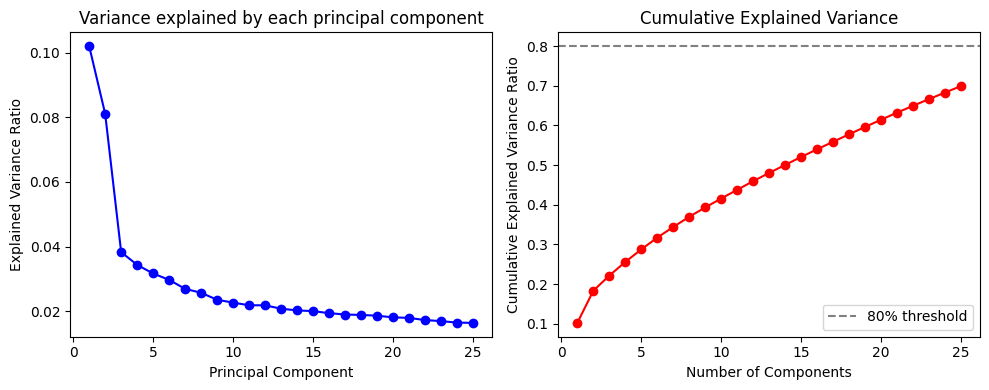

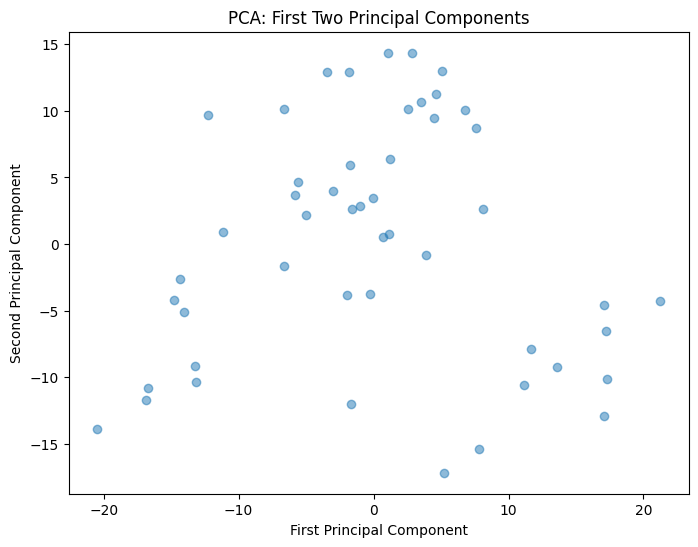

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(range(1, len(explained) + 1), explained, 'bo-')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Variance explained by each principal component')

ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.axhline(y=0.8, color='gray', linestyle='--', label='80% threshold')
ax2.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First Two Principal Components')
plt.show()

### Clustering with K-means 

Now let's cluster the result of the PCA. I'll try 2 to 7 clusters and measure the silhouette score. 

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []
labels_by_k = {}
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    y = km.fit_predict(X_pca)
    sil = silhouette_score(X_pca, y)
    sizes = pd.Series(y).value_counts().sort_index().to_dict()
    results.append({"k": k, "silhouette": sil, "sizes": sizes})
    labels_by_k[k] = y

res_df = pd.DataFrame(results)
display(res_df)

,k,silhouette,sizes
0,2,0.073301,"{0: 22, 1: 27}"
1,3,0.096344,"{0: 19, 1: 19, 2: 11}"
2,4,0.083734,"{0: 17, 1: 13, 2: 11, 3: 8}"
3,5,0.079298,"{0: 14, 1: 5, 2: 11, 3: 8, 4: 11}"
4,6,0.079210,"{0: 8, 1: 3, 2: 11, 3: 8, 4: 7, 5: 12}"
5,7,0.055602,"{0: 9, 1: 3, 2: 11, 3: 4, 4: 7, 5: 12, 6: 3}"
6,8,0.092277,"{0: 5, 1: 4, 2: 12, 3: 5, 4: 12, 5: 6, 6: 2, 7..."
7,9,0.090664,"{0: 5, 1: 4, 2: 12, 3: 5, 4: 10, 5: 5, 6: 2, 7..."


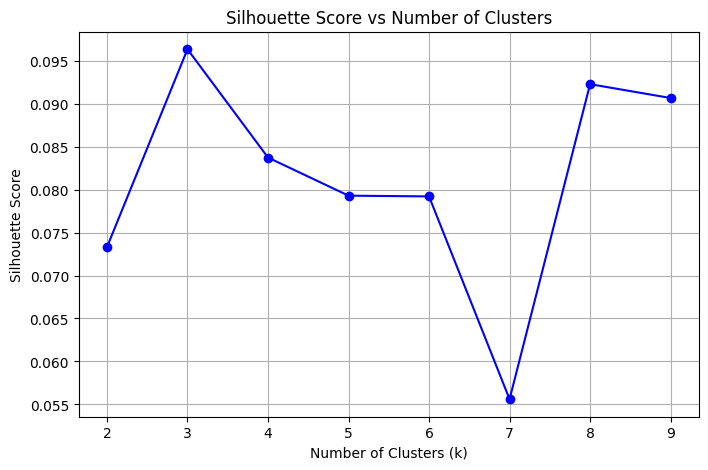

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(res_df['k'], res_df['silhouette'], 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

In [10]:
best_k = 4
print("Chosen k =", int(best_k))
y_clust = labels_by_k[int(best_k)]

Chosen k = 4


### Univariate Summaries and ANOVA

Let's calculate how each gene is expressed between different sample clusters and use ANOVA to find out which genes differ the most between clusters.

In [ ]:
import seaborn as sns
from scipy import stats

clusters = pd.Series(y_clust, index=df_top_genes.columns, name="cluster")

# Calculate summary statistics
summaries = []
for g in df_top_genes.index:
    s = df_top_genes.loc[g].groupby(clusters).agg(["mean", "median", "std"])
    s["gene"] = g
    s["cluster"] = s.index
    summaries.append(s.reset_index(drop=True))

summary_df = pd.concat(summaries, ignore_index=True)
display(summary_df.head(8))

,mean,median,std,gene,cluster
0,-0.028911,0.725751,1.025160,ENST00000677236.1,0
1,-0.134540,-0.172796,1.060519,ENST00000677236.1,1
2,-0.249391,-1.139978,1.028679,ENST00000677236.1,2
3,0.460910,0.857633,0.844926,ENST00000677236.1,3
4,0.124925,-0.688232,1.049706,ENST00000678703.1,0
5,0.168566,-0.688232,1.106873,ENST00000678703.1,1
6,-0.313148,-0.688232,0.835410,ENST00000678703.1,2
7,-0.048967,-0.688232,1.032509,ENST00000678703.1,3


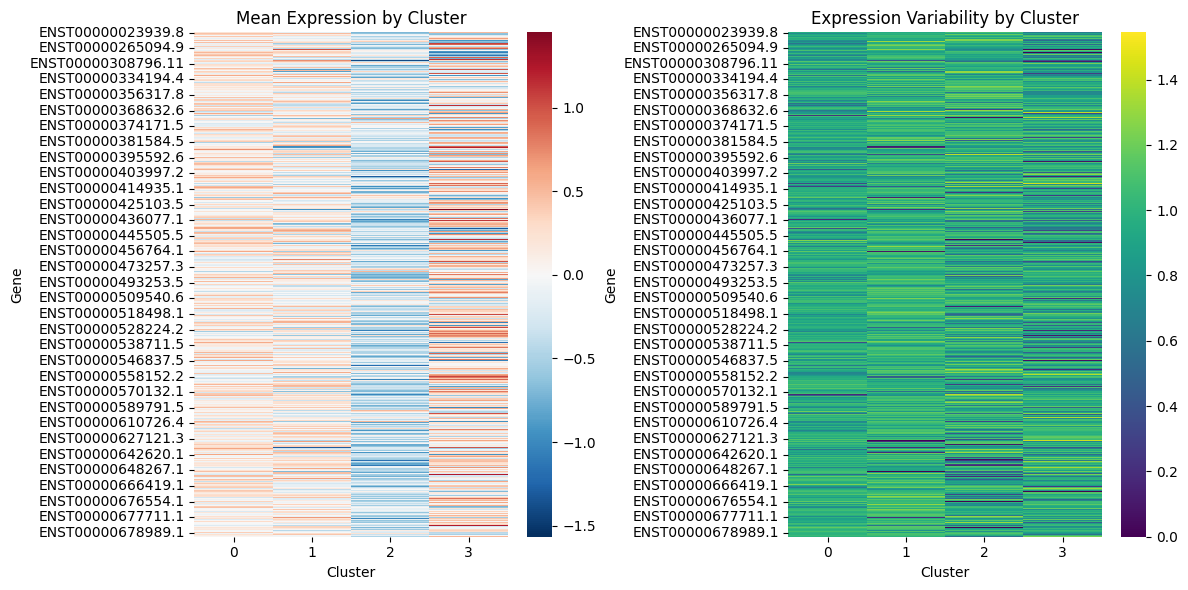

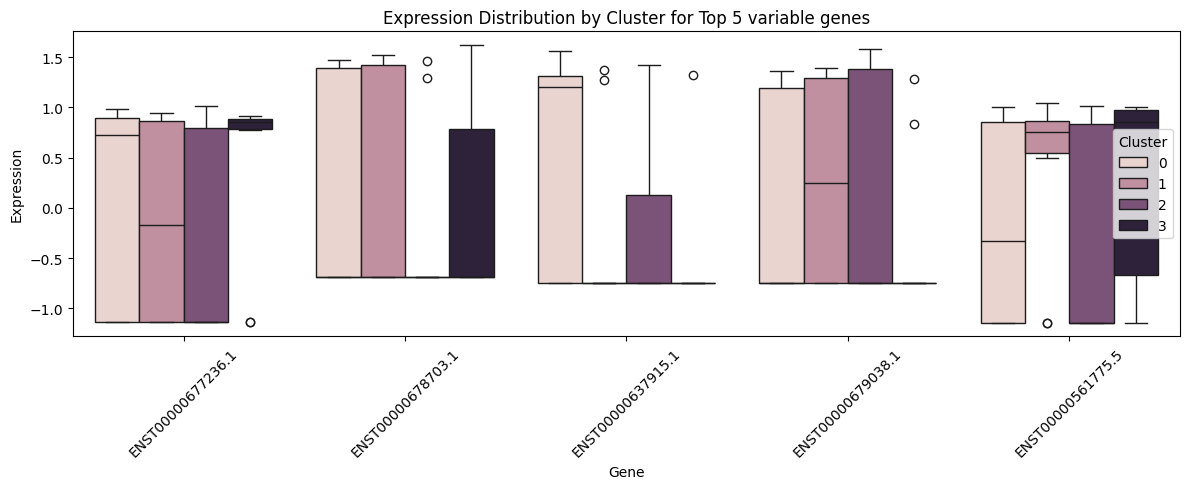

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pivot_mean = summary_df.pivot(index='gene', columns='cluster', values='mean')
sns.heatmap(pivot_mean, cmap='RdBu_r', center=0)
plt.title('Mean Expression by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gene')

plt.subplot(1, 2, 2)
pivot_std = summary_df.pivot(index='gene', columns='cluster', values='std') 
sns.heatmap(pivot_std, cmap='viridis')
plt.title('Expression Variability by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gene')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
top5_genes = top_genes[:5]
plot_data = []
for g in top5_genes:
    gene_data = df_top_genes.loc[g]
    plot_data.append(pd.DataFrame({
        'Expression': gene_data.values,
        'Cluster': clusters,
        'Gene': g
    }))
plot_df = pd.concat(plot_data)

sns.boxplot(data=plot_df, x='Gene', y='Expression', hue='Cluster')
plt.xticks(rotation=45)
plt.title('Expression Distribution by Cluster for Top 5 variable genes')
plt.tight_layout()
plt.show()

In [51]:
from scipy.stats import f_oneway

anova_results = []
for g in df_top_genes.index:
    cluster_groups = [df_top_genes.loc[g][clusters == i] for i in range(len(set(clusters)))]
    f_stat, p_val = f_oneway(*cluster_groups)
    anova_results.append({
        'gene': g,
        'f_statistic': f_stat,
        'p_value': p_val
    })

anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('f_statistic', ascending=False)  
print("\nTop genes with significant differences between clusters:")
display(anova_df.head())



Top genes with significant differences between clusters:


,gene,f_statistic,p_value
677,ENST00000390290.3,42.168797,3.970280e-13
731,ENST00000519670.1,40.119257,8.971131e-13
804,ENST00000381995.5,31.564650,3.858025e-11
688,ENST00000427632.2,30.128029,7.753230e-11
753,ENST00000303329.9,24.162448,1.815208e-09


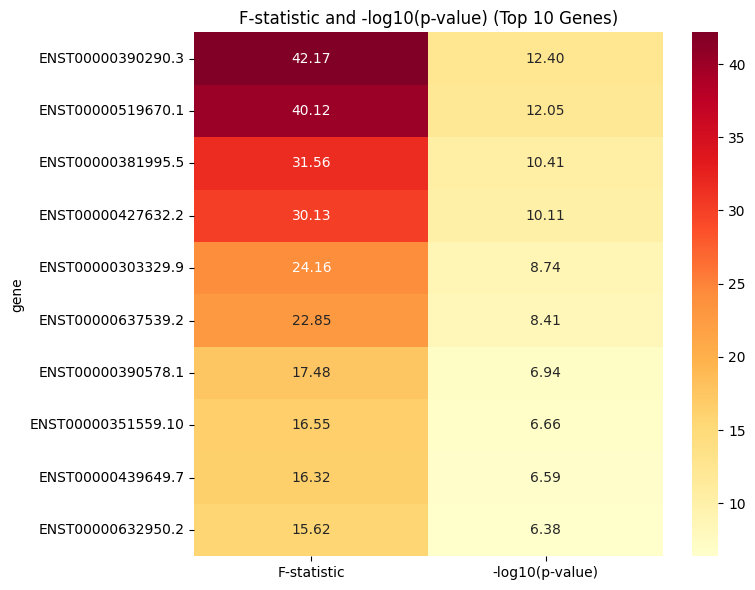

In [53]:
plt.figure(figsize=(8, 6))
combined_pivot = pd.DataFrame({
    'gene': anova_df['gene'],
    'F-statistic': anova_df['f_statistic'],
    '-log10(p-value)': -np.log10(anova_df['p_value'])  
}).set_index('gene').head(10)

sns.heatmap(combined_pivot, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('F-statistic and -log10(p-value) (Top 10 Genes)')
plt.tight_layout()
plt.show()

### Multiple Testing Correction (FDR)
 
Let's apply the FDR correction to our ANOVA p-values to control for false positives when testing multiple genes simultaneously.

In [55]:
from statsmodels.stats.multitest import multipletests

anova_df["qval"] = multipletests(anova_df["p_value"], method="fdr_bh")[1]
display(anova_df.sort_values("qval").head(5))

,gene,f_statistic,p_value,qval
677,ENST00000390290.3,42.168797,3.970280e-13,3.970280e-10
731,ENST00000519670.1,40.119257,8.971131e-13,4.485565e-10
804,ENST00000381995.5,31.564650,3.858025e-11,1.286008e-08
688,ENST00000427632.2,30.128029,7.753230e-11,1.938307e-08
753,ENST00000303329.9,24.162448,1.815208e-09,3.630415e-07


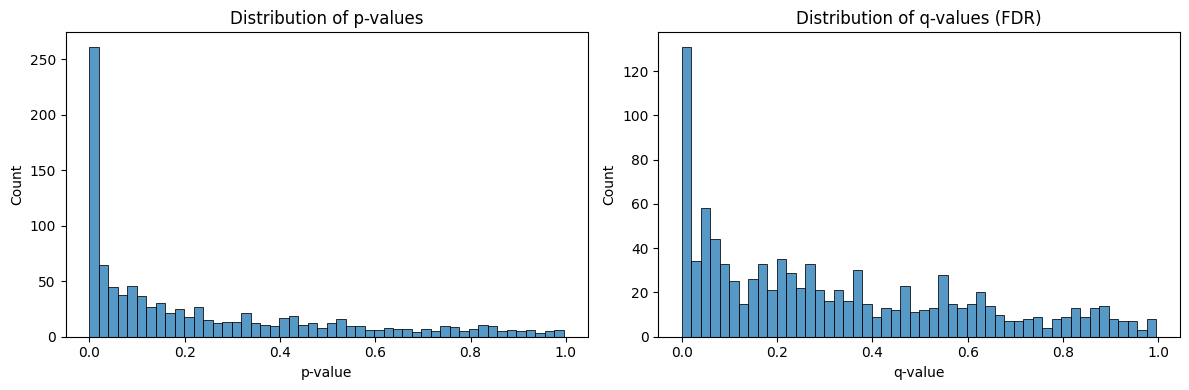

In [58]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=anova_df, x="p_value", bins=50)
plt.title("Distribution of p-values")
plt.xlabel("p-value")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data=anova_df, x="qval", bins=50)
plt.title("Distribution of q-values (FDR)")
plt.xlabel("q-value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Effect Size Table 

To complement the significance tests, compute and report effect sizes (e.g., Cohen’s *d*) between the two clusters.  
Calculate how large the difference is, computer the difference between the means of two clusters. 

In [60]:
def cohens_d(a, b):
    na, nb = len(a), len(b)
    s_p = np.sqrt(((na-1)*a.var(ddof=1) + (nb-1)*b.var(ddof=1)) / (na+nb-2))
    return (a.mean() - b.mean()) / s_p

largest_two = pd.Series(y_clust).value_counts().index[:2]
i, j = largest_two[0], largest_two[1]
eff = []
for g in top_genes[:500]:
    a = df_top_genes.loc[g, clusters==i].values
    b = df_top_genes.loc[g, clusters==j].values
    if len(a)>2 and len(b)>2:
        eff.append((g, cohens_d(a,b)))
eff_df = pd.DataFrame(eff, columns=["gene","cohens_d"]).sort_values("cohens_d", key=abs, ascending=False)
display(eff_df.head(10))

,gene,cohens_d
376,ENST00000551085.5,2.255536
139,ENST00000446668.5,1.920257
176,ENST00000375695.2,1.854336
297,ENST00000644678.1,1.789981
186,ENST00000453024.6,1.789001
84,ENST00000646116.1,1.747972
223,ENST00000575069.5,1.700503
341,ENST00000358808.6,1.698228
400,ENST00000361036.10,1.592269
124,ENST00000338799.9,1.516007


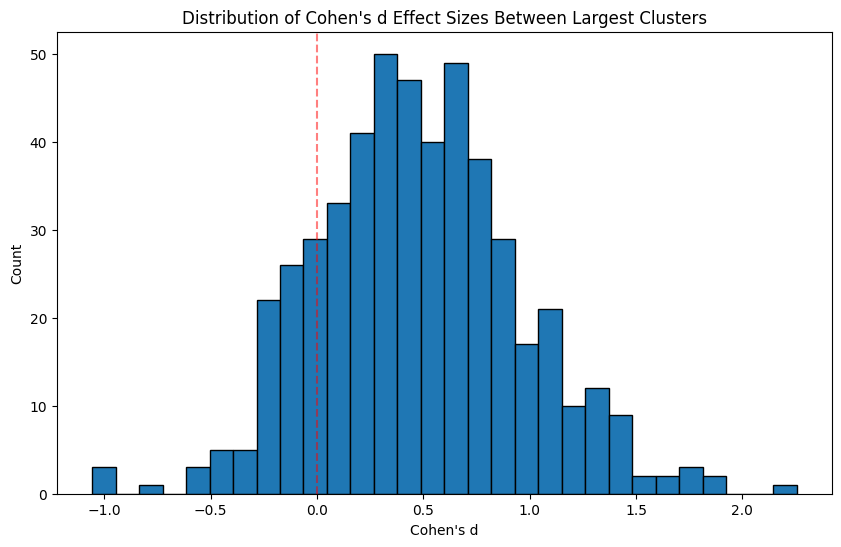

In [61]:
plt.figure(figsize=(10,6))
plt.hist(eff_df["cohens_d"], bins=30, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.title("Distribution of Cohen's d Effect Sizes Between Largest Clusters")
plt.xlabel("Cohen's d")
plt.ylabel("Count")
plt.show()

### Multivariate Explanation (Logistic Regression / Random Forest / Permutation Importance)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X = df_top_genes.T.values
y = y_clust
X_reduced = selector.fit_transform(X, y)
selected_genes = df_top_genes.index[selector.get_support()]

logreg = LogisticRegression(max_iter=2000, multi_class="multinomial", penalty="l2", C=0.1)
logreg.fit(X_reduced, y)
coef_df = pd.DataFrame(logreg.coef_, columns=selected_genes)

perm_logreg = permutation_importance(logreg, X_reduced, y, n_repeats=30, random_state=42, n_jobs=-1)
imp_df_logreg = pd.DataFrame({
    "gene": selected_genes,
    "importance_mean": perm_logreg.importances_mean,
    "importance_std": perm_logreg.importances_std
}).sort_values("importance_mean", ascending=False)

rf = RandomForestClassifier(n_estimators=300, max_depth=5, min_samples_leaf=5, random_state=42, n_jobs=-1)
rf.fit(X_reduced, y)

perm_rf = permutation_importance(rf, X_reduced, y, n_repeats=30, random_state=42, n_jobs=-1)
imp_df = pd.DataFrame({
    "gene": selected_genes,
    "importance_mean": perm_rf.importances_mean,
    "importance_std": perm_rf.importances_std
}).sort_values("importance_mean", ascending=False)

print("Random Forest Permutation Importance:")
display(imp_df.tail(5))
print("\nLogistic Regression Permutation Importance:")
display(imp_df_logreg.tail(5))


/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest Permutation Importance:


,gene,importance_mean,importance_std
0,ENST00000439649.7,0.004762,0.016397
5,ENST00000519670.1,0.001361,0.017423
9,ENST00000632950.2,-0.005442,0.014842
2,ENST00000637539.2,-0.009524,0.010181
8,ENST00000390578.1,-0.010884,0.010181



Logistic Regression Permutation Importance:


,gene,importance_mean,importance_std
1,ENST00000351559.10,0.061905,0.023259
9,ENST00000632950.2,0.048299,0.023259
4,ENST00000427632.2,0.046939,0.017595
2,ENST00000637539.2,0.044218,0.017543
8,ENST00000390578.1,0.023810,0.012997


Permutation-importance bar plot

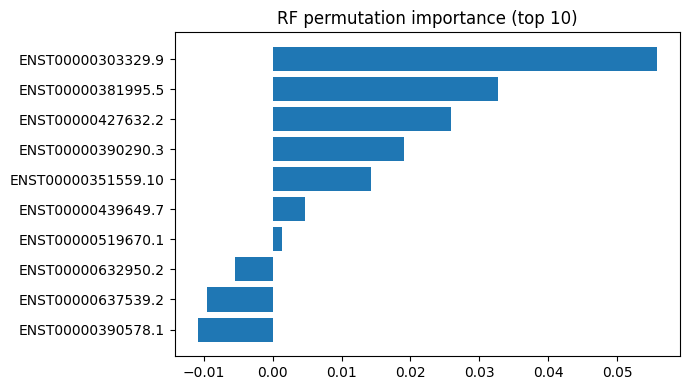

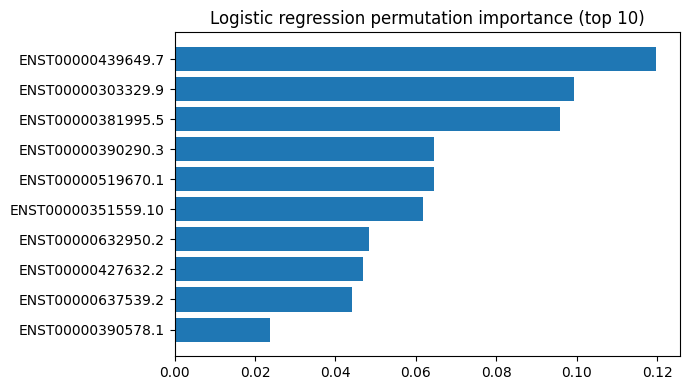

In [71]:
import matplotlib.pyplot as plt

# Plot RF importance
imp_top = imp_df.head(10)
plt.figure(figsize=(7,4))
plt.barh(imp_top["gene"][::-1], imp_top["importance_mean"][::-1])
plt.title("RF permutation importance (top 10)")
plt.tight_layout()

# Plot logistic regression importance 
imp_top_logreg = imp_df_logreg.head(10)
plt.figure(figsize=(7,4))
plt.barh(imp_top_logreg["gene"][::-1], imp_top_logreg["importance_mean"][::-1])
plt.title("Logistic regression permutation importance (top 10)")
plt.tight_layout()

### Visualizations: Heatmap, t-SNE, UMAP

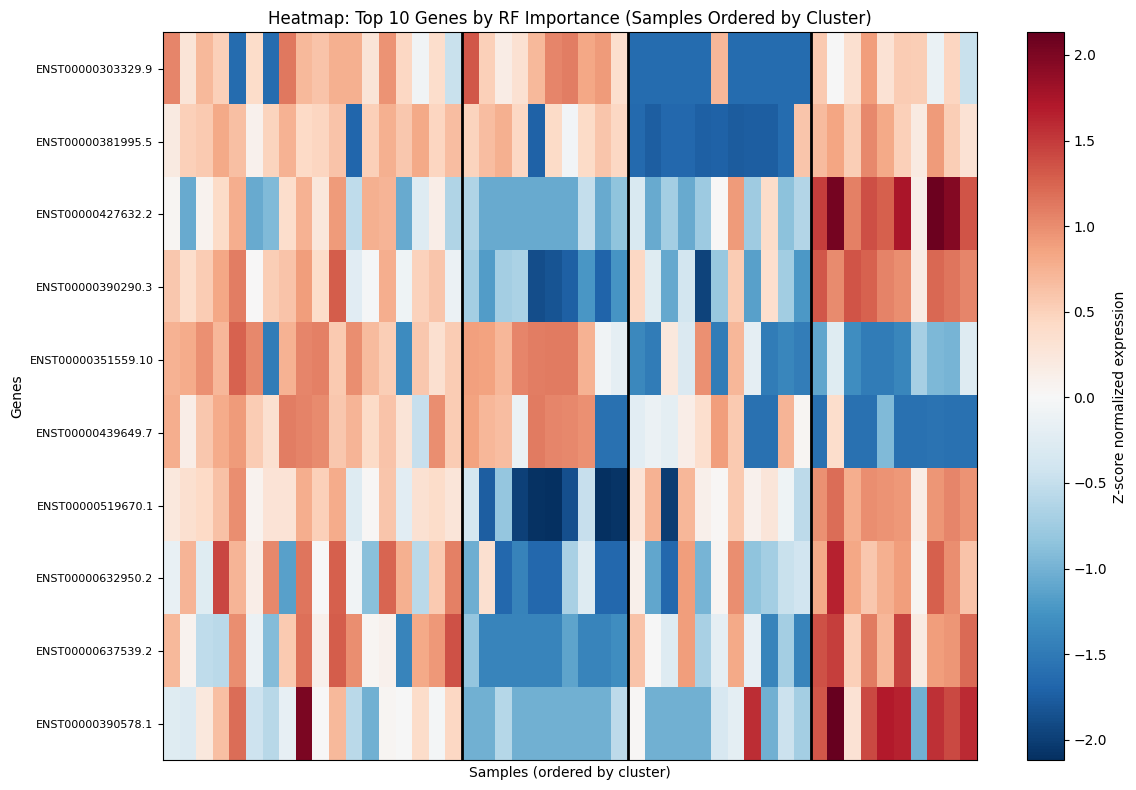

Cluster distribution:
0    18
1    10
2    11
3    10
Name: count, dtype: int64

Top 10 genes by RF importance: ['ENST00000303329.9', 'ENST00000381995.5', 'ENST00000427632.2', 'ENST00000390290.3', 'ENST00000351559.10', 'ENST00000439649.7', 'ENST00000519670.1', 'ENST00000632950.2', 'ENST00000637539.2', 'ENST00000390578.1']


In [80]:
import umap
from sklearn.manifold import TSNE

# Get top 10 genes based on Random Forest permutation importance
top10_genes = imp_df["gene"].head(10).tolist()
mat = df_top_genes.loc[top10_genes]

# Sort samples by cluster assignment
order = np.argsort(y_clust)
mat_ord = mat.iloc[:, order]

# Create the heatmap with better visualization
plt.figure(figsize=(12, 8))

# Create the heatmap
im = plt.imshow(mat_ord, aspect='auto', cmap='RdBu_r', interpolation='nearest')
plt.colorbar(im, label='Z-score normalized expression')

# Add cluster boundaries
cluster_boundaries = []
current_cluster = y_clust[order[0]]
for i, cluster in enumerate(y_clust[order]):
    if cluster != current_cluster:
        cluster_boundaries.append(i)
        current_cluster = cluster

# Draw vertical lines at cluster boundaries
for boundary in cluster_boundaries:
    plt.axvline(x=boundary-0.5, color='black', linewidth=2)

plt.title("Heatmap: Top 10 Genes by RF Importance (Samples Ordered by Cluster)")
plt.xlabel("Samples (ordered by cluster)")
plt.ylabel("Genes")

# Add gene labels
plt.yticks(range(len(top10_genes)), top10_genes, fontsize=8)

# Add cluster information
cluster_counts = pd.Series(y_clust).value_counts().sort_index()
cluster_labels = [f"Cluster {i} (n={count})" for i, count in cluster_counts.items()]
plt.xticks([], [])  # Remove x-axis ticks for cleaner look

plt.tight_layout()
plt.show()

# Print cluster information
print("Cluster distribution:")
print(pd.Series(y_clust).value_counts().sort_index())
print(f"\nTop 10 genes by RF importance: {top10_genes}")

Computing t-SNE embeddings...
Computing UMAP embeddings...


/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/vera.galinova/dev/masters/vis_rnaseq_data/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


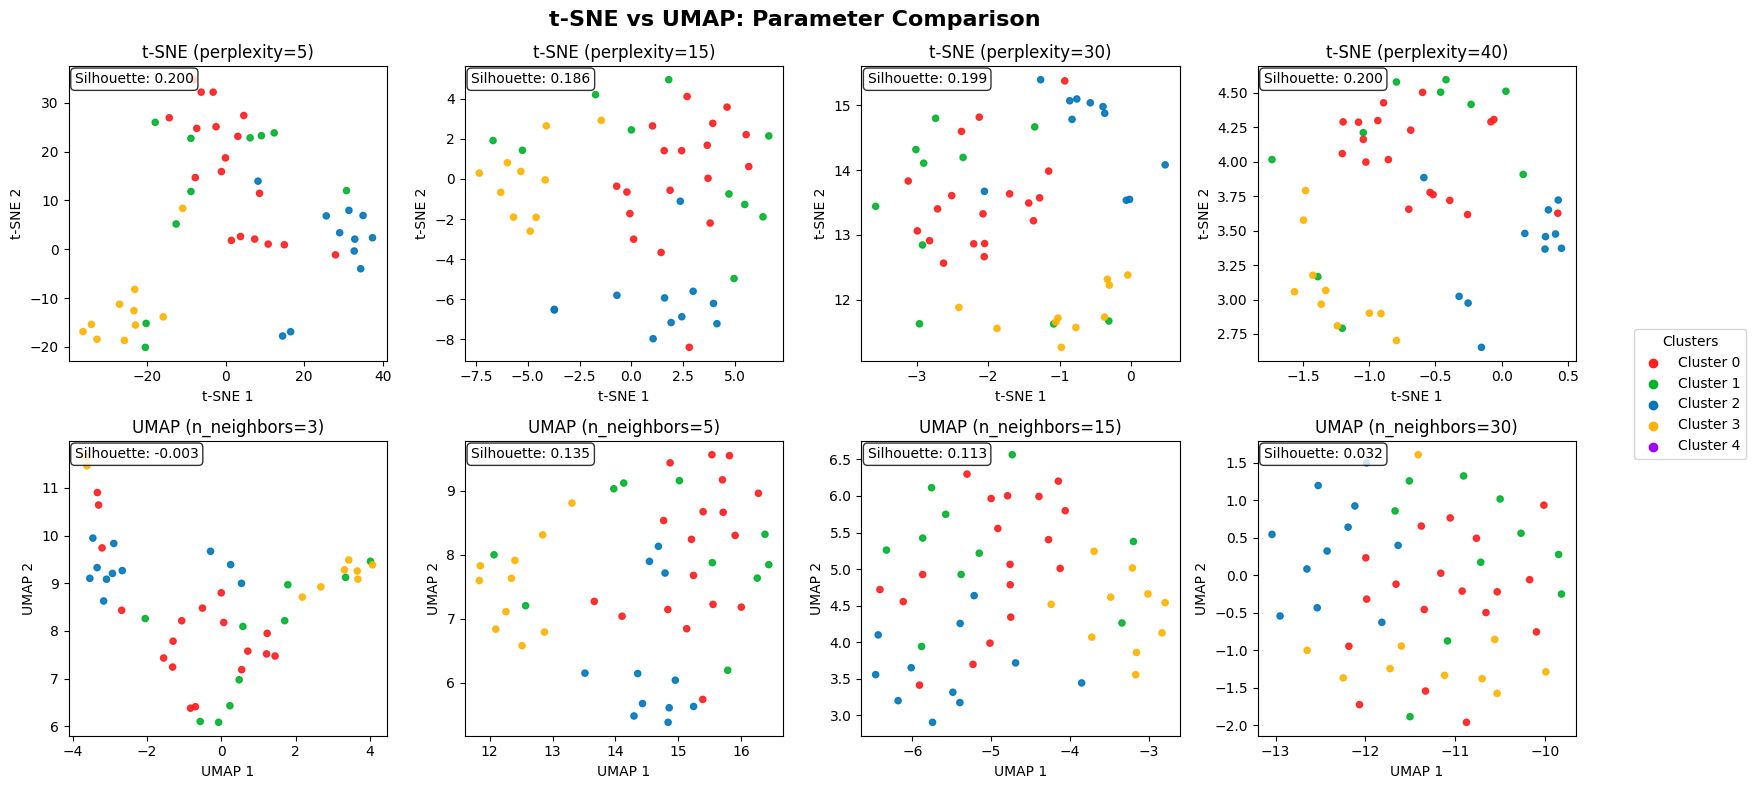

In [89]:
# Comprehensive comparison of t-SNE and UMAP with different parameters
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Define parameter ranges for comparison
tsne_params = [5, 15, 30, 40]  # perplexity values
umap_params = [3, 5, 15, 30]    # n_neighbors values

# Create comprehensive comparison figure
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('t-SNE vs UMAP: Parameter Comparison', fontsize=16, fontweight='bold')

# Define a bright color palette for 5 clusters
colors = ['#FF1E1E', '#00B32C', '#0077BB', '#FFB300', '#9F00FF']  # Red, Green, Blue, Yellow, Purple

# t-SNE with different perplexity values
print("Computing t-SNE embeddings...")
for i, perplexity in enumerate(tsne_params):
    ax = axes[0, i]
    tsne_emb = TSNE(n_components=2, random_state=42, init="pca", 
                    perplexity=perplexity, learning_rate="auto").fit_transform(X_pca)
    
    scatter = ax.scatter(tsne_emb[:,0], tsne_emb[:,1], c=[colors[i] for i in y_clust], s=20, alpha=0.9)
    ax.set_title(f"t-SNE (perplexity={perplexity})")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    
    # Calculate metrics
    ari = adjusted_rand_score(y_clust, y_clust)  # Perfect clustering
    sil = silhouette_score(tsne_emb, y_clust)
    ax.text(0.02, 0.98, f"Silhouette: {sil:.3f}", transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# UMAP with different n_neighbors values
print("Computing UMAP embeddings...")
for i, n_neighbors in enumerate(umap_params):
    ax = axes[1, i]
    umap_emb = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors).fit_transform(X_pca)
    
    scatter = ax.scatter(umap_emb[:,0], umap_emb[:,1], c=[colors[i] for i in y_clust], s=20, alpha=0.9)
    ax.set_title(f"UMAP (n_neighbors={n_neighbors})")
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    
    # Calculate metrics
    sil = silhouette_score(umap_emb, y_clust)
    ax.text(0.02, 0.98, f"Silhouette: {sil:.3f}", transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a legend
handles = [plt.scatter([], [], c=color, label=f'Cluster {i}') for i, color in enumerate(colors)]
fig.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()